In [1]:
#importing necessary libraries to read in data
import pandas as pd
import numpy as np
cases = pd.read_csv('STD Cases.csv')

In [2]:
#Examining the breakdown of information using .info()
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42680 entries, 0 to 42679
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          42680 non-null  int64  
 1   Disease        42530 non-null  object 
 2   Disease Code   42530 non-null  float64
 3   State          42530 non-null  object 
 4   Year           42530 non-null  float64
 5   Gender         42530 non-null  object 
 6   Age            42530 non-null  object 
 7   Age Code       42530 non-null  object 
 8   STD Cases      42530 non-null  float64
 9   Population     35483 non-null  float64
 10  Rate per 100K  35483 non-null  float64
dtypes: float64(5), int64(1), object(5)
memory usage: 3.6+ MB


### Observation
From the breakdown above, we are able to determine that there are no null values in the dataset and that our data types correspond correctly with the dimensions that we will be observing in the rest of this analysis

In [3]:
#Taking a look at the first few rows
#Eliminating the index as it is redundant
cases.drop('index', axis=1, inplace=True)
cases.head()

,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
0,Chlamydia,274.0,Alabama,1996.0,Male,0-14 years,0-14,25.0,468394.0,5.34
1,Chlamydia,274.0,Alabama,1996.0,Male,15-19 years,15-19,164.0,165920.0,98.84
2,Chlamydia,274.0,Alabama,1996.0,Male,20-24 years,20-24,193.0,152848.0,126.27
3,Chlamydia,274.0,Alabama,1996.0,Male,25-29 years,25-29,88.0,152778.0,57.60
4,Chlamydia,274.0,Alabama,1996.0,Male,30-34 years,30-34,55.0,155850.0,35.29


In [4]:
# Our year column could be cleaner so we'll drop the 0's

# Checking for irregular values
#cases.Year.unique()

# Let's remove nan values as they won't be convertible using our method vector slicing to int conversion
cases.Year = cases.Year.fillna(0)
cases["Year"] = cases["Year"].astype(str).str[:-2].astype(np.int64)
cases.head()

,Disease,Disease Code,State,Year,Gender,Age,Age Code,STD Cases,Population,Rate per 100K
0,Chlamydia,274.0,Alabama,1996,Male,0-14 years,0-14,25.0,468394.0,5.34
1,Chlamydia,274.0,Alabama,1996,Male,15-19 years,15-19,164.0,165920.0,98.84
2,Chlamydia,274.0,Alabama,1996,Male,20-24 years,20-24,193.0,152848.0,126.27
3,Chlamydia,274.0,Alabama,1996,Male,25-29 years,25-29,88.0,152778.0,57.60
4,Chlamydia,274.0,Alabama,1996,Male,30-34 years,30-34,55.0,155850.0,35.29


### Initial Questions Based on Preview

- Which disease has the highest total count since 1996?
- Which disease was most common in each year?
- Which disease was most common in each state in 2014?
- In which Gender was each disease most prevalent each year?
- Which age group was affected the most by each disease in the past decade?

In [5]:
#Finding unique values for our disease column
cases["Disease"].unique()

array(['Chlamydia', 'Gonorrhea', 'Primary and Secondary Syphilis', nan],
      dtype=object)

### Limitations

Noticeably, one of the limitations of this dataset is that it only concretely covers three diseases. We will only be able to do a comparison utilizing these three.

In [6]:
# To answer the first question we only need the disease column and the Number of STD cases
df1 = cases[["Disease", "STD Cases"]]
df1.head()

,Disease,STD Cases
0,Chlamydia,25.0
1,Chlamydia,164.0
2,Chlamydia,193.0
3,Chlamydia,88.0
4,Chlamydia,55.0


In [7]:
# Grouping by diseases to do an aggregate sum
df2 = df1.groupby('Disease').sum()
print(df2)

                                 STD Cases
Disease                                   
Chlamydia                       18991264.0
Gonorrhea                        6454097.0
Primary and Secondary Syphilis    205913.0


In [8]:
# To answer the second question we will create another subset called q2 containing disease, year and std cases
# After we create q2, we will group first by disease and then by year in order to aggregate
# As a bonus we will also visualize this data to observe the change year by year in each disease

q2 = cases[["Disease", "Year", "STD Cases"]]
q2.head()

,Disease,Year,STD Cases
0,Chlamydia,1996,25.0
1,Chlamydia,1996,164.0
2,Chlamydia,1996,193.0
3,Chlamydia,1996,88.0
4,Chlamydia,1996,55.0


In [9]:
q2_aggregate = q2.groupby(["Disease", "Year"]).sum()

In [10]:
q2_aggregate.head(50)

STD Cases
Disease                        Year           
Chlamydia                      1996   492084.0
                               1997   537384.0
                               1998   608490.0
                               1999   662250.0
                               2000   708698.0
                               2001   783127.0
                               2002   834503.0
                               2003   877478.0
                               2004   929462.0
                               2005   976445.0
                               2006  1030911.0
                               2007  1108374.0
                               2008  1210523.0
                               2009  1244180.0
                               2010  1307893.0
                               2011  1412791.0
                               2012  1422976.0
                               2013  1401906.0
                               2014  1441789.0
Gonorrhea                      1996   327723.0
                               1997   326971.0
                               1998   356107.0
                               1999   360598.0
                               2000   362920.0
                               2001   361758.0
                               2002   351836.0
                               2003   335104.0
                               2004   330132.0
                               2005   339593.0
                               2006   358366.0
                               2007   355991.0
                               2008   336742.0
                               2009   301174.0
                               2010   309341.0
                               2011   321849.0
                               2012   334826.0
                               2013   333004.0
                               2014   350062.0
Primary and Secondary Syphilis 1996    11414.0
                               1997     8548.0
                               1998     7018.0
                               1999     6613.0
                               2000     5973.0
                               2001     6100.0
                               2002     6862.0
                               2003     7177.0
                               2004     7980.0
                               2005     8724.0
                               2006     9756.0
                               2007    11466.0

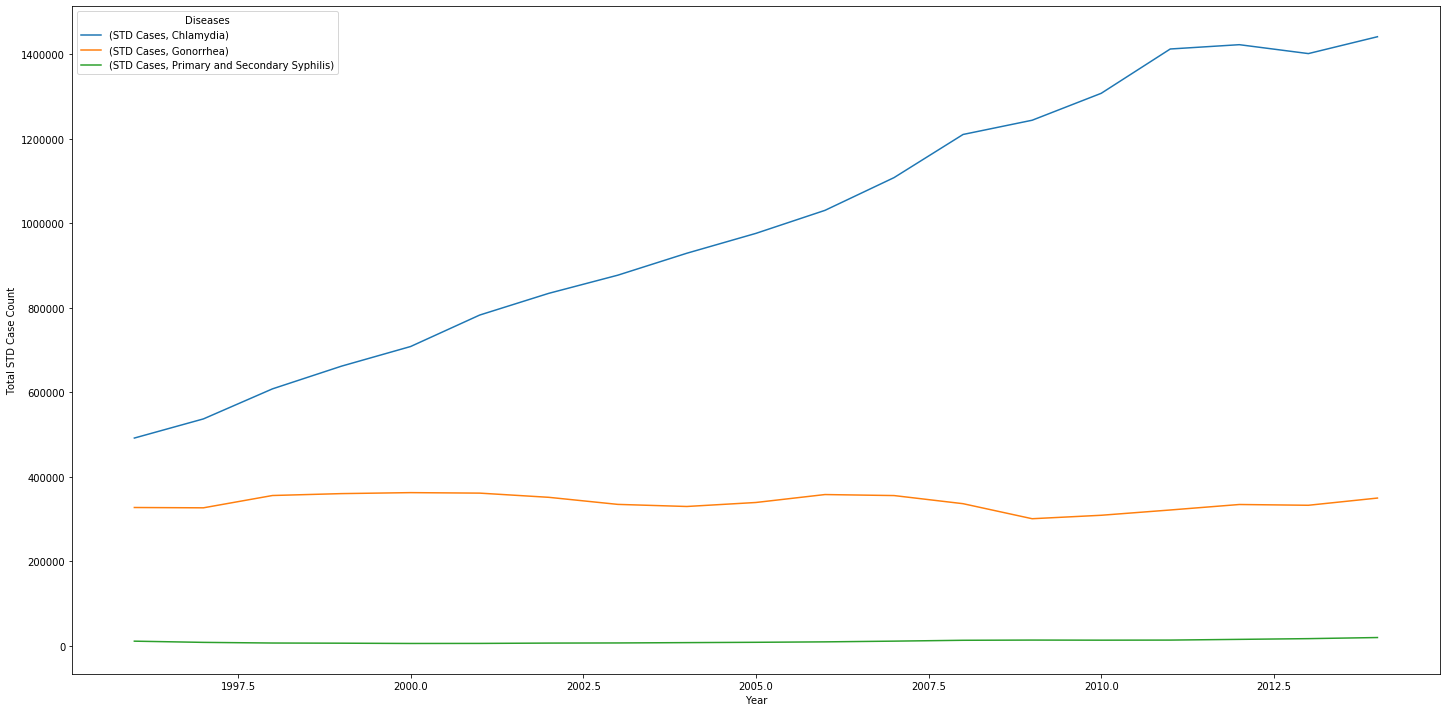

In [11]:
# Let's Visualize
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

q2_aggregate.unstack('Disease').plot(figsize=(20,10))
plt.tight_layout()
plt.ylabel('Total STD Case Count')
legend = plt.legend()
legend.set_title("Diseases")
plt.show()
plt.close()

### Observations

- Between these three diseases in particular, Chlamydia has clearly experienced the most rapid growth between 1996 - 2014.
- Over time, cases for Gonorrhea and Syphillis have generally maintained the a similar total amount from year to year.
- Chlamydia is clearly the leading disease with regards to detected case amount during this time.
- One potential question we could ask is if there was an initiative during the late 90's that introduced more testing specifically for Chlamydia or was there a better test developed to detect Chlamydia.

In [12]:
# Which disease was most common in each state in 2014?
# Our objective is to create a subset containing Disease, State, Year = 2014, and STD Cases

mc = cases[["Disease", "State", "Year", "STD Cases"]]
mc_2014 = mc[mc["Year"] == 2014]
mcg_2014 = mc_2014.groupby(["Disease", "State", "Year"]).sum()
mcg_2014.head(10)

STD Cases
Disease   State                Year           
Chlamydia Alabama              2014    29010.0
          Alaska               2014     5789.0
          Arizona              2014    32397.0
          Arkansas             2014    15605.0
          California           2014   176308.0
          Colorado             2014    21863.0
          Connecticut          2014    13382.0
          Delaware             2014     4473.0
          District of Columbia 2014     5293.0
          Florida              2014    84194.0